## Late Payments Analysis
This is a financial analytics project which deals with  a data set containing customer ID it and payment amount and other important features defining a clear picture on every individuals transaction with respect to my the payment

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBRegressor
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Set
The data set that we haveis resourced from kegel with the title finance factoring of IBM late payment histories

In [2]:
ds = pd.read_csv('IBM-Accounts-Receivable.csv')
ds.head(5)

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


### Data Preprocessing 
#### 1) Check for Missing Values

In [3]:
ds.isnull().sum()

countryCode      0
customerID       0
PaperlessDate    0
invoiceNumber    0
InvoiceDate      0
DueDate          0
InvoiceAmount    0
Disputed         0
SettledDate      0
PaperlessBill    0
DaysToSettle     0
DaysLate         0
dtype: int64

#### 2) Check for Misclassified Feature Types

In [4]:
ds.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   PaperlessDate  2466 non-null   object 
 3   invoiceNumber  2466 non-null   int64  
 4   InvoiceDate    2466 non-null   object 
 5   DueDate        2466 non-null   object 
 6   InvoiceAmount  2466 non-null   float64
 7   Disputed       2466 non-null   object 
 8   SettledDate    2466 non-null   object 
 9   PaperlessBill  2466 non-null   object 
 10  DaysToSettle   2466 non-null   int64  
 11  DaysLate       2466 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 231.3+ KB


In [5]:
ds.dtypes[ds.dtypes == 'object']

customerID       object
PaperlessDate    object
InvoiceDate      object
DueDate          object
Disputed         object
SettledDate      object
PaperlessBill    object
dtype: object

In [6]:
ds['PaperlessDate'] = pd.to_datetime(ds['PaperlessDate'])
ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'])
ds['DueDate'] = pd.to_datetime(ds['DueDate'])
ds['SettledDate'] = pd.to_datetime(ds['SettledDate'])

In [7]:
ds['Disputed'] = OrdinalEncoder().fit_transform(ds[['Disputed']])
ds['PaperlessBill'] = OrdinalEncoder().fit_transform(ds[['PaperlessBill']])

#### 3) Corelation Analysis

<AxesSubplot:>

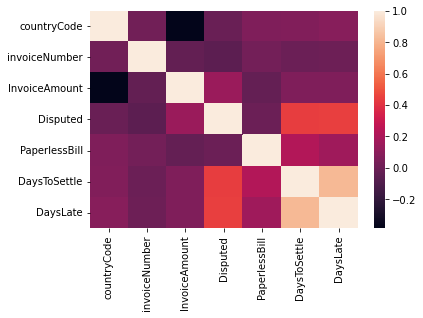

In [16]:
corelations = ds.corr()
sns.heatmap(corelations)

In [9]:
ds.corr()

,countryCode,invoiceNumber,InvoiceAmount,Disputed,PaperlessBill,DaysToSettle,DaysLate
countryCode,1.000000,0.015996,-0.384881,-0.007806,0.059781,0.066341,0.090462
invoiceNumber,0.015996,1.000000,-0.032699,-0.050752,0.025532,-0.005921,0.004402
InvoiceAmount,-0.384881,-0.032699,1.000000,0.148876,-0.026988,0.060786,0.059980
Disputed,-0.007806,-0.050752,0.148876,1.000000,-0.004499,0.439126,0.443232
PaperlessBill,0.059781,0.025532,-0.026988,-0.004499,1.000000,0.225976,0.163333
DaysToSettle,0.066341,-0.005921,0.060786,0.439126,0.225976,1.000000,0.820552
DaysLate,0.090462,0.004402,0.059980,0.443232,0.163333,0.820552,1.000000


In [10]:
x = ds[['countryCode','invoiceNumber','InvoiceAmount','Disputed','PaperlessBill','DaysToSettle']]
y = ds['DaysLate']

#### 4) Split Data into test & Train

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state = 42)

#### 5) Scale Data for better Modeling Process

In [12]:
std_sclr = StandardScaler()
x_train = std_sclr.fit_transform(xtrain)
x_test = std_sclr.fit_transform(xtest)

### Data Modeling
#### 1) Linear Regresion

In [13]:
model1= LinearRegression()
model1.fit(x_train,ytrain)
ypred1=model1.predict(x_test)
print('\n Mean Absolute Error',mean_absolute_error(ytest,ypred1))
print('\n Root Mean Absolute Error',np.sqrt(mean_absolute_error(ytest,ypred1)))


 Mean Absolute Error 2.760358249260155

 Root Mean Absolute Error 1.6614325894420618


[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

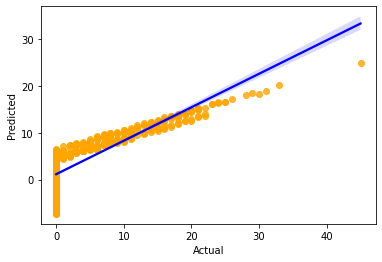

In [17]:
plot = sns.regplot(ytest,ypred1,scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
plot.set(xlabel='Actual', ylabel='Predicted')

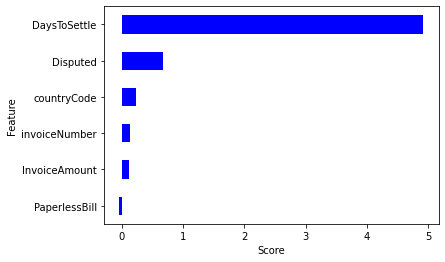

In [23]:
imp_features = pd.Series(model1.coef_, index = x.columns)
imp_features = imp_features.sort_values(ascending = True)
imp_features.plot(kind = 'barh', color = 'blue')
plt.ylabel("Feature")
plt.xlabel("Score")
plt.show()

#### 2) Random Forest

In [14]:
model2= RandomForestRegressor()
model2.fit(x_train,ytrain)
ypred2=model2.predict(x_test)
print('\n Mean Absolute Error',mean_absolute_error(ytest,ypred2))
print('\n Root Mean Absolute Error',np.sqrt(mean_absolute_error(ytest,ypred2)))


 Mean Absolute Error 0.24568126520681263

 Root Mean Absolute Error 0.4956624508743956


[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

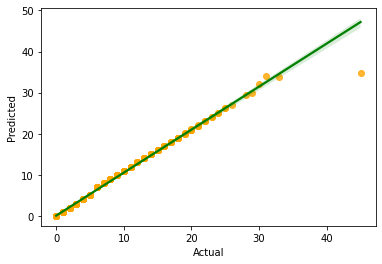

In [26]:
plot = sns.regplot(ytest,ypred2,scatter_kws={"color": "orange"}, line_kws={"color": "green"})
plot.set(xlabel='Actual', ylabel='Predicted')

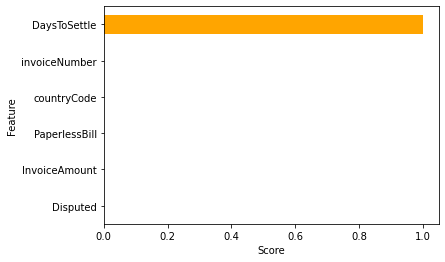

In [24]:
imp_features = pd.Series(model2.feature_importances_, index = x.columns)
imp_features = imp_features.sort_values(ascending = True)
imp_features.plot(kind = 'barh', color = 'orange')
plt.ylabel("Feature")
plt.xlabel("Score")
plt.show()

#### 3) XG boost

In [15]:
model4= XGBRegressor()
model4.fit(x_train,ytrain)
ypred4=model4.predict(x_test)
print('\n Mean Absolute Error',mean_absolute_error(ytest,ypred4))
print('\n Root Mean Absolute Error',np.sqrt(mean_absolute_error(ytest,ypred4)))


 Mean Absolute Error 0.24166153433318463

 Root Mean Absolute Error 0.4915908200253384


[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

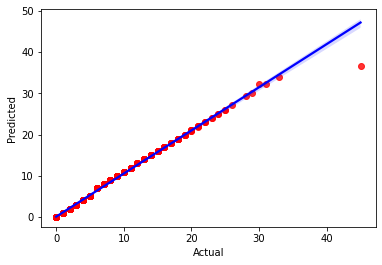

In [29]:
plot = sns.regplot(ytest,ypred4,scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plot.set(xlabel='Actual', ylabel='Predicted')

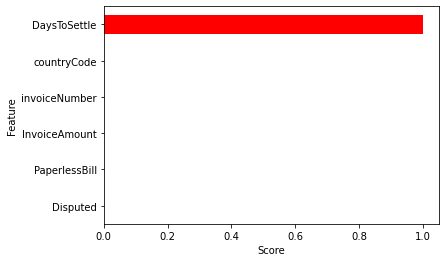

In [30]:
imp_features = pd.Series(model4.feature_importances_, index = x.columns)
imp_features = imp_features.sort_values(ascending = True)
imp_features.plot(kind = 'barh', color = 'red')
plt.ylabel("Feature")
plt.xlabel("Score")
plt.show()

### Summary:-
* From our feature analysis and correlation analysis we can determine that the payment paid at a later date is directly influenced by features such as base given to settle the bill.
* Other features such as the invoice amount the status of the bill whether it is disputed or not and the county where the payer is from has a also has an influential effect on days late.
* Out of the 3 machine learning models that I ran on this IBM data such as linear regression, XG boost and random forest, I have got the least root mean absolute error of 0.4915 from XG Boost.
* Thus its recommended , bringing changes with respect to these feature will defently have visible effects on on time payment.